<a href="https://colab.research.google.com/github/IvanKatorgin/Satistics-in-Python/blob/main/%D0%A1%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D0%BA%D0%B0_%D0%B2_Python_%D0%B4%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D0%B5%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Домашнее задание Корреляция и регрессия. Каторгин И.П.

Для работы используйте датасет “happines_corruption.csv”.

Описание столбцов:

Country - Name of the country. Название страны

happiness_score - Average of responses to the primary life evaluation question from the Gallup World Poll (GWP). 0-10. Среднее значение ответов на основной вопрос об оценке жизни из опроса Gallup World Poll (GWP). 0-10

gdp_per_capita - The extent to which GDP contributes to the calculation of the Happiness Score. Степень участия ВВП в расчете показателя счастья

family - The extent to which Family contributes to the calculation of the Happiness Score. Степень, в которой семья участвует в расчете показателя счастья

health - The extent to which Life expectancy contributed to the calculation of the Happiness Score. Степень, в которой ожидаемая продолжительность жизни повлияла на расчет показателя счастья

freedom - The extent to which Freedom contributed to the calculation of the Happiness Score. Степень, в которой свобода способствовала расчету показателя счастья

generosity - щедрость - A numerical value calculated based on poll participants’ perceptions of generosity in their country. Числовое значение, рассчитанное на основе восприятия участниками опроса щедрости в их стране

government_trust - The extent to which Perception of Corruption contributes to Happiness Score. Степень, в которой восприятие коррупции влияет на показатель счастья

dystopia_residual - A score based on a hypothetical comparison to the world’s saddest country. Оценка, основанная на гипотетическом сравнении с самой печальной страной в мире

continent - Region of the country. Регион страны

Задание 1

- Базово изучите датасет (достаточно методов info() и describe()).

- Выдвиньте пару гипотез, например, “Верно ли, что чем выше ВВП, тем выше и уровень счастья?” или “Есть ли взаимосвязь между уровнем доверия правительству и уровнем счастья?”. Постарайтесь подтвердить или опровергнуть их визуально и с помощью расчётов.

Желательно, но не обязательно:

- Составьте корреляционную матрицу всех числовых признаков набора данных и визуализируйте её с помощью тепловой карты.

In [ ]:
import pandas as pd, numpy as np, math, matplotlib.pyplot as plt, seaborn as sns
import scipy.stats as st
from scipy.stats import ttest_ind
from scipy.stats import f_oneway, shapiro
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [ ]:
happines_corruption = pd.read_csv('happines_corruption.csv', encoding = "utf-8", sep = ',')
happines_corruption.head()

,Country,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,continent,Year,social_support,cpi_score
0,Norway,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,Europe,2015,0.0,88
1,Denmark,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,Europe,2015,0.0,91
2,Iceland,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,Europe,2015,0.0,79
3,Switzerland,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,Europe,2015,0.0,86
4,Finland,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,Europe,2015,0.0,90


In [ ]:
happines_corruption.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            792 non-null    object 
 1   happiness_score    792 non-null    float64
 2   gdp_per_capita     792 non-null    float64
 3   family             792 non-null    float64
 4   health             792 non-null    float64
 5   freedom            792 non-null    float64
 6   generosity         792 non-null    float64
 7   government_trust   792 non-null    float64
 8   dystopia_residual  792 non-null    float64
 9   continent          792 non-null    object 
 10  Year               792 non-null    int64  
 11  social_support     792 non-null    float64
 12  cpi_score          792 non-null    int64  
dtypes: float64(9), int64(2), object(2)
memory usage: 80.6+ KB


In [ ]:
happines_corruption.describe()

,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,Year,social_support,cpi_score
count,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000
mean,5.473310,0.929217,0.504998,0.648691,0.427016,0.212440,0.125720,1.379277,2017.500000,0.609302,44.327020
std,1.124726,0.385774,0.552736,0.232261,0.148003,0.121660,0.109032,1.075276,1.708904,0.640754,19.508833
min,2.566900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000,0.000000,11.000000
25%,4.590750,0.644242,0.000000,0.510070,0.325433,0.125784,0.052862,0.000000,2016.000000,0.000000,30.000000
50%,5.485500,0.994544,0.000000,0.685397,0.439621,0.197000,0.089000,1.731948,2017.500000,0.176214,38.000000
75%,6.300500,1.228677,1.040410,0.815641,0.546280,0.273250,0.154250,2.236894,2019.000000,1.268250,57.000000
max,7.808700,2.096000,1.610574,1.141000,0.724000,0.838075,0.551910,3.602140,2020.000000,1.644000,91.000000


Гипотеза 1

Уровень здоровья зависит от ВВП (Верно ли, что чем выше ВВП, тем лучше здоровье)

Посмотрим графически

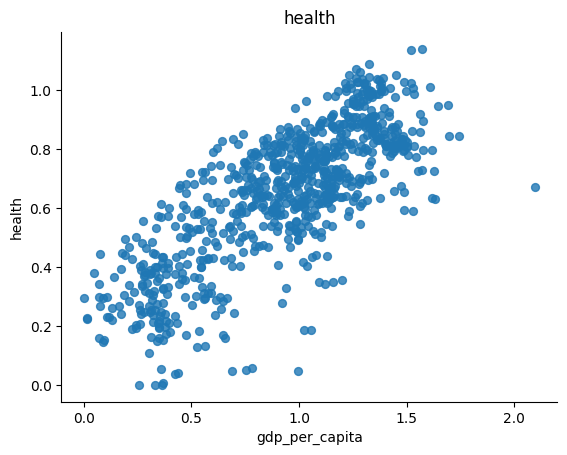

In [ ]:
happines_corruption.plot(kind='scatter', x='gdp_per_capita', y='health', s=32, alpha=.8, title='health')
plt.gca().spines[['top', 'right',]].set_visible(False)

Визуально гипотеза подтверждается - чем выше уровень ВВП, тем лучше показатель здоровья

Теперь подтвердим гипотезу статистическим тестом

Проверим данные на нормальность с помощью критерия Пирсона и построим гистограммы распределения

In [ ]:
stat, p = st.normaltest(happines_corruption['gdp_per_capita']) # Критерий Пирсона

alpha = 0.05

if p < alpha: # условие статистической значимости
  print('Statistics=%.5f, p-value=%.5f' % (stat, p))
  print("Отклоняем нулевую гипотезу >> Данные распределены не нормально")
else:
  print('Statistics=%.5f, p-value=%.5f' % (stat, p))
  print("Не отклоняем нулевую гипотезу >> Данные распределены нормально")

Statistics=52.67113, p-value=0.00000
Отклоняем нулевую гипотезу >> Данные распределены не нормально


In [ ]:
stat, p = st.normaltest(happines_corruption['health']) # Критерий Пирсона

alpha = 0.05

if p < alpha: # условие статистической значимости
  print('Statistics=%.5f, p-value=%.5f' % (stat, p))
  print("Отклоняем нулевую гипотезу >> Данные распределены не нормально")
else:
  print('Statistics=%.5f, p-value=%.5f' % (stat, p))
  print("Не отклоняем нулевую гипотезу >> Данные распределены нормально")

Statistics=38.85876, p-value=0.00000
Отклоняем нулевую гипотезу >> Данные распределены не нормально


Построим гистограммы распределения

Text(0.5, 1.0, 'гистограммы распределения выборок')

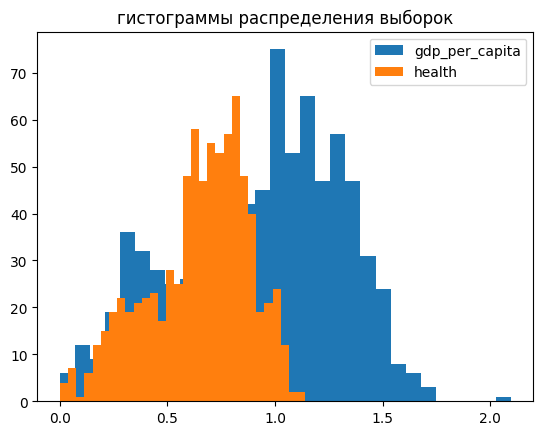

In [ ]:
plt.hist(happines_corruption['gdp_per_capita'], bins=30, label = 'gdp_per_capita');
plt.hist(happines_corruption['health'], bins=30, label = 'health');
plt.legend()
plt.title('гистограммы распределения выборок')

Посмотрим, есть ли выбросы (построим диаграмму "ящик с усами")

{'whiskers': [<matplotlib.lines.Line2D at 0x7a28d1451b40>,
 'caps': [<matplotlib.lines.Line2D at 0x7a28d14527d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a28d1453700>],
 'medians': [<matplotlib.lines.Line2D at 0x7a28d14514e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a28d1453340>],
 'means': []}

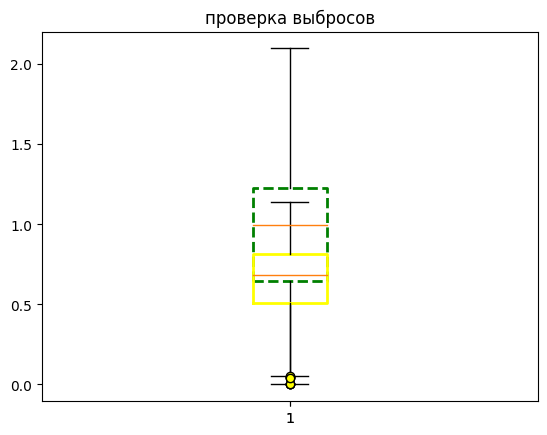

In [ ]:
boxprops = dict(linestyle='--', linewidth=2, color='green')
flierprops = dict(marker='o', markerfacecolor='green', markersize=6, linestyle='none')
plt.boxplot(happines_corruption['gdp_per_capita'], boxprops=boxprops, flierprops=flierprops)
plt.title('проверка выбросов')

boxprops_ = dict(linestyle='-', linewidth=2, color='yellow')
flierprops_ = dict(marker='o', markerfacecolor='yellow', markersize=6, linestyle='none')
plt.boxplot(happines_corruption['health'], boxprops=boxprops_, flierprops=flierprops_)

Выбросов практически нет

Проверка на нормальность показала, что данные распределены не нормально, что также подтверждено визуально (гистограммой).

Поскольку данные распределены не нормально, то для проверки гипотезы можно использовать тест Манна-Уитни

In [ ]:
 # Тест Манна-Уитни

stat, p = st.mannwhitneyu (happines_corruption['gdp_per_capita'], happines_corruption['health'], alternative='two-sided')

print(f"Статистика = {stat:.5f}, p = {p:.5f}")

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, уровень здоворья зависит от уровня ВВП')
else:
    print('Отклоняем нулевую гипотезу, выборки, вероятно, различаются')

Статистика = 461068.00000, p = 0.00000
Отклоняем нулевую гипотезу, выборки, вероятно, различаются


Выводы:

Несмотря на то, что графически имеется зависимость между здоровьем и уровнем ВВП, статистический тест показал обратное, что уровень здоровья статистически не зависит от уровня ВВП. Гипотеза не подтверилась

Гипотеза 2

Показатель счастья зависит от уровня свободы (чем выше уровень свободы, тем более счастливы люди)

Посмотрим графически

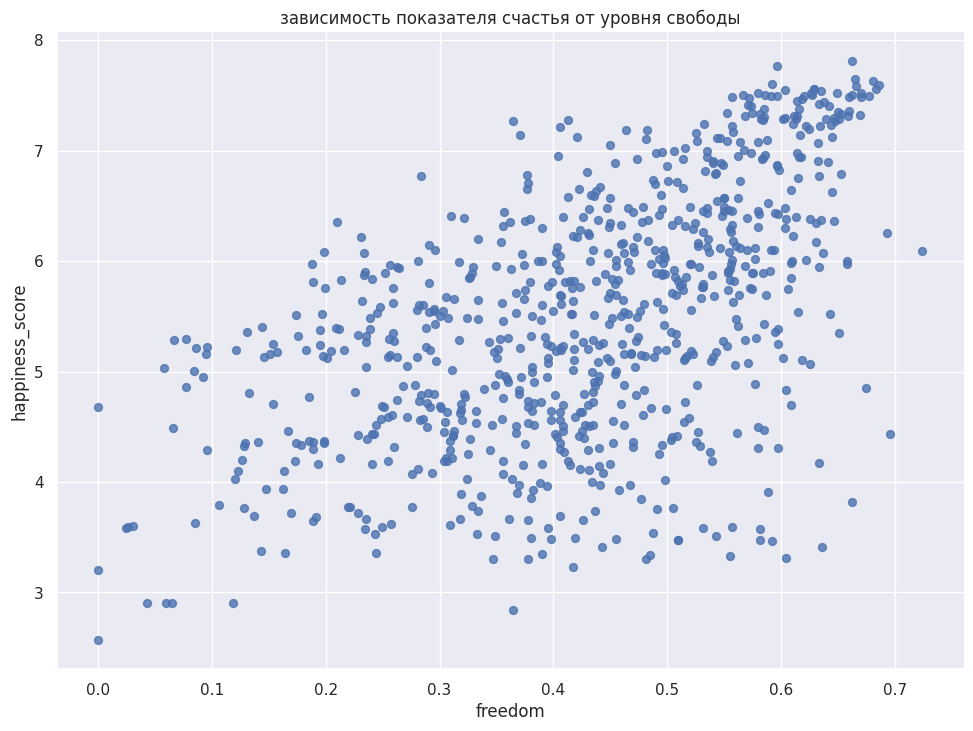

In [ ]:
happines_corruption.plot(kind='scatter', x='freedom', y='happiness_score', s=32, alpha=.8, title='зависимость показателя счастья от уровня свободы')
plt.gca().spines[['top', 'right',]].set_visible(False)

Визуально невозможно однозначно ответить, что уровень счастья как-то зависит от уровня свободы

Проверим гипотезу статистическим тестом

Проверим данные на нормальность с помощью критерия Пирсона и построим гистограммы распределения

In [ ]:
stat, p = st.normaltest(happines_corruption['happiness_score']) # Критерий Пирсона

alpha = 0.05

if p < alpha: # условие статистической значимости
  print('Statistics=%.5f, p-value=%.5f' % (stat, p))
  print("Отклоняем нулевую гипотезу >> Данные распределены не нормально")
else:
  print('Statistics=%.5f, p-value=%.5f' % (stat, p))
  print("Не отклоняем нулевую гипотезу >> Данные распределены нормально")

Statistics=49.95233, p-value=0.00000
Отклоняем нулевую гипотезу >> Данные распределены не нормально


In [ ]:
stat, p = st.normaltest(happines_corruption['freedom']) # Критерий Пирсона

alpha = 0.05

if p < alpha: # условие статистической значимости
  print('Statistics=%.5f, p-value=%.5f' % (stat, p))
  print("Отклоняем нулевую гипотезу >> Данные распределены не нормально")
else:
  print('Statistics=%.5f, p-value=%.5f' % (stat, p))
  print("Не отклоняем нулевую гипотезу >> Данные распределены нормально")

Statistics=35.00566, p-value=0.00000
Отклоняем нулевую гипотезу >> Данные распределены не нормально


Построим гистограммы распределения выборок

Text(0.5, 1.0, 'гистограммы распределения выборок')

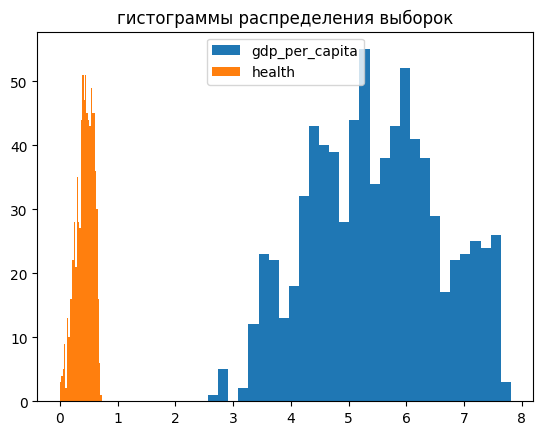

In [ ]:
plt.hist(happines_corruption['happiness_score'], bins=30, label = 'gdp_per_capita');
plt.hist(happines_corruption['freedom'], bins=30, label = 'health');
plt.legend()
plt.title('гистограммы распределения выборок')

Посмотрим, есть ли выбросы (построим диаграмму "ящик с усами")

{'whiskers': [<matplotlib.lines.Line2D at 0x7a28cde41fc0>,
 'caps': [<matplotlib.lines.Line2D at 0x7a28cde42500>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a28cde41d20>],
 'medians': [<matplotlib.lines.Line2D at 0x7a28cde42a40>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a28cde42ce0>],
 'means': []}

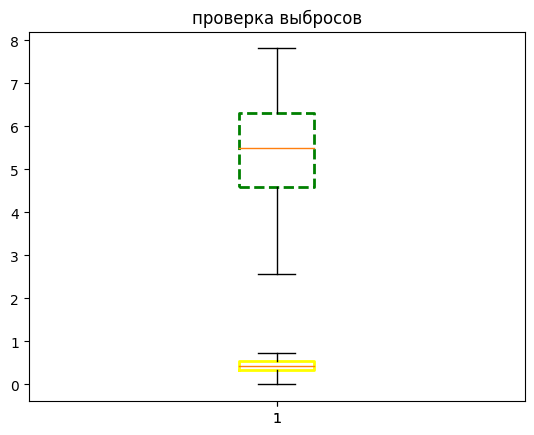

In [ ]:
boxprops = dict(linestyle='--', linewidth=2, color='green')
flierprops = dict(marker='o', markerfacecolor='green', markersize=6, linestyle='none')
plt.boxplot(happines_corruption['happiness_score'], boxprops=boxprops, flierprops=flierprops)
plt.title('проверка выбросов')

boxprops_ = dict(linestyle='-', linewidth=2, color='yellow')
flierprops_ = dict(marker='o', markerfacecolor='yellow', markersize=6, linestyle='none')
plt.boxplot(happines_corruption['freedom'], boxprops=boxprops_, flierprops=flierprops_)

Выбросы не обнаружены

Проверка на нормальность показала, что данные распределены не нормально, что также подтверждено визуально (гистограммой).

Поскольку данные распределены не нормально, то для проверки гипотезы можно использовать тест Манна-Уитни

In [ ]:
 # Тест Манна-Уитни

stat, p = st.mannwhitneyu (happines_corruption['happiness_score'], happines_corruption['freedom'], alternative='two-sided')

print(f"Статистика = {stat:.5f}, p = {p:.5f}")

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, уровень здоворья зависит от уровня ВВП')
else:
    print('Отклоняем нулевую гипотезу, выборки, вероятно, различаются')

Статистика = 627264.00000, p = 0.00000
Отклоняем нулевую гипотезу, выборки, вероятно, различаются


Выводы:

Cтатистический тест показал, что показатель счастья никак не зависит от уровня свободы. Что также было подтверждено графически. Гипотеза не подтверилась

Составим корреляционную матрицу всех числовых признаков набора данных и визуализируем её с помощью тепловой карты

In [ ]:
# form correlation matrix
matrix = pd.DataFrame(happines_corruption[['happiness_score', 'gdp_per_capita',	'family',	'health',	'freedom',	'generosity',	'government_trust',	'dystopia_residual']])
matrix.corr()

,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual
happiness_score,1.000000,0.793267,0.154946,0.753534,0.544284,0.155419,0.455477,0.174161
gdp_per_capita,0.793267,1.000000,0.218191,0.774980,0.340260,-0.018355,0.359068,0.042710
family,0.154946,0.218191,1.000000,-0.054683,0.013833,0.245437,0.114767,0.600243
health,0.753534,0.774980,-0.054683,1.000000,0.381869,-0.028882,0.312741,-0.073157
freedom,0.544284,0.340260,0.013833,0.381869,1.000000,0.306240,0.473980,-0.015270
generosity,0.155419,-0.018355,0.245437,-0.028882,0.306240,1.000000,0.280039,0.147750
government_trust,0.455477,0.359068,0.114767,0.312741,0.473980,0.280039,1.000000,0.098366
dystopia_residual,0.174161,0.042710,0.600243,-0.073157,-0.015270,0.147750,0.098366,1.000000


<Axes: >

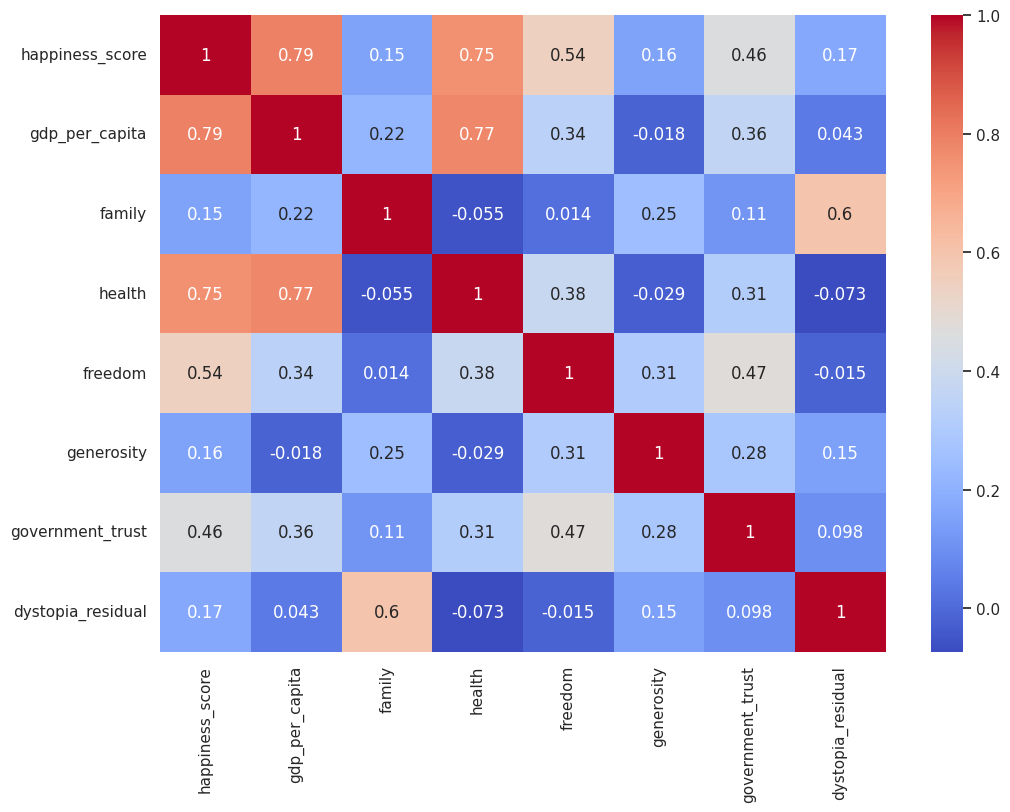

In [ ]:
# визуализирetv при помощи тепловой карты
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(matrix.corr(), annot=True, cmap='coolwarm')

Тепловая карта показала, что нет ни одного коэффициента корреляции больше 0,8. Наибольший показатель, который от которого зависит счастье - ВВП, и то его коэффициент составляпет всего 0,79

Выводы по заданию 1:

Проверка различных гипотез показала, что в целом уровень счастья очень сложный показатель, и нельзя однозначно ответить на вопрос, что непосредственно влияет на уровень счастья. Возможно все зависимости имеют нелинейный характер. Для выявления каких-то закономерностей нужны дополнительные исследования

Задание 2

Продолжаем изучать цены на газ в Южной Корее. Файл с данными “gas_sales_data.csv” вы сможете найти в материалах занятия (для этого набора данных вы ранее рассчитывали коэффициенты корреляции в тренажере).

В этом задании нужно окончательно ответить на вопрос:

Есть ли связь между среднемесячной температурой и потреблением газа в Южной Корее?

Для этого:

- Оставьте только два столбца:'Temperature' и 'Sum'.

- Постройте диаграмму рассеяния.

- Постройте модель линейной регрессии для выбранных признаков.

- Рассчитайте точность модели на тестовой выборке.

- Выведите график остатков.

Требования по оформлению графиков:

У графиков должен быть заголовок, подписи осей, легенда (опционально). Каждая визуализация должным образом оформлена и может быть интерпретирована даже в отрыве от контекста.

In [ ]:
gas_sales_data = pd.read_csv('gas_sales_data.csv', encoding = "utf-8", sep = ',')
gas_sales_data.head()

,Year,Month,Temperature,Gangwondo,Seoul,Gyeonggido,Incheon,Gyeongsangnamdo,Gyeongsangbukdo,Gwangju,...,Daejeon,Busan,Sejong,Ulsan,Jeollanamdo,Jeollabukdo,Jeju,Chungcheongnamdo,Chungcheongbukdo,Sum
0,2000,1,-1.20,16219,662424,363014,139454,42129,55362,39465,...,52992,85787,0,69241,22508,34507,0,20158,27838,1717175
1,2000,2,-0.99,16280,689177,375937,145834,42604,52863,40674,...,53950,87282,0,70910,22310,33784,0,23492,27175,1766341
2,2000,3,6.64,14105,566528,323145,121324,35990,47282,34610,...,41898,74476,0,63627,18033,29315,0,21156,22904,1490537
3,2000,4,12.11,10364,396231,237437,91421,28698,40393,25898,...,28618,58316,0,47106,15920,19783,0,17447,16818,1096964
4,2000,5,17.59,6843,262940,169495,67239,21073,35083,18426,...,17503,45915,0,43749,13808,14375,0,14508,12299,790248


In [ ]:
table = pd.DataFrame(gas_sales_data[['Temperature', 'Sum']])
table

,Temperature,Sum
0,-1.20,1717175
1,-0.99,1766341
2,6.64,1490537
3,12.11,1096964
4,17.59,790248
...,...,...
247,27.00,1142099
248,21.40,1160655
249,14.90,1471242
250,9.00,2116835


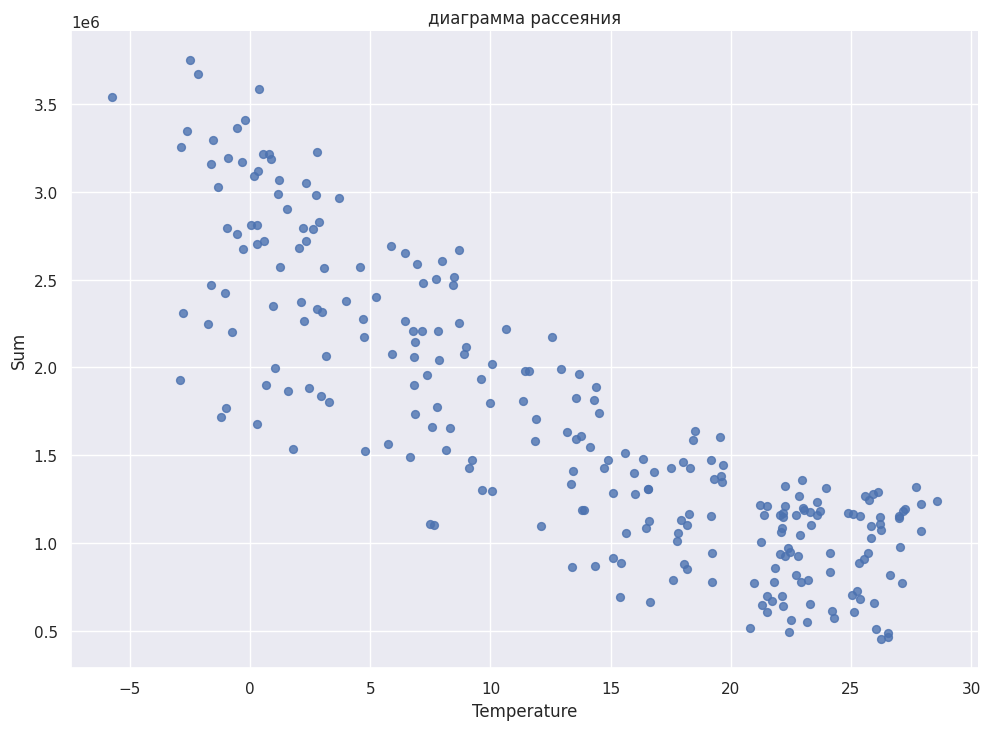

In [ ]:
from matplotlib import pyplot as plt
table.plot(kind='scatter', x='Temperature', y='Sum', s=32, alpha=.8, title='диаграмма рассеяния')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
X = table[['Temperature']]
y = table['Sum']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
X_train.shape

(176, 1)

In [ ]:
y_train.shape

(176,)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)  # метод обучается на данных и подбирает оптимальные коэффициенты

LinearRegression()

In [ ]:
model.coef_

array([-69183.68395953])

In [ ]:
model.intercept_

2571665.5705572804

In [ ]:
# y = -69183.684 * x - 2571665.57

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([1441204.17465859,  736914.27195059, 1659132.7791311 ,
       1246106.18589271,  805406.11907052, 1632842.97922648,
        641440.78808644,  691944.87737689, 1508312.34809933,
        832387.75581473, 2683051.30173212, 1971151.19378857,
       1969075.68326979, 1834167.49954871, 1041322.48137251,
       1211514.34391295, 1213589.85443174, 1615547.0582366 ,
       1100820.4495777 , 2499714.53923937, 2099141.0091137 ,
        736222.43511099, 1431518.45890425, 1358875.59074675,
       1643912.36866   , 1983604.25690129,  816475.50850404,
       1625232.77399093, 2042410.38826689,  765279.58237399,
       1041322.48137251, 2609024.75989543,  956918.38694189,
       1934483.84129002, 1425291.92734789, 2344743.08717003,
       2294930.83471917,  769430.60341156, 2487953.31296625,
       2073543.04604868,  817167.34534364, 2968779.91648497,
       2721102.32790986, 2551602.30220902, 1580263.37941724,
       1906810.36770621, 1243338.83853433,  824777.55057919,
       1785738.92077704,

In [ ]:
y_test

165    1480101
6       464203
111    1634442
172    1474082
115     907624
        ...   
119    2703917
75     1583588
113     949311
118    1776507
120    3256385
Name: Sum, Length: 76, dtype: int64

In [ ]:
model.score(X_test, y_test) # метод возвращает значение коэффициента детерминации

0.769403571876491

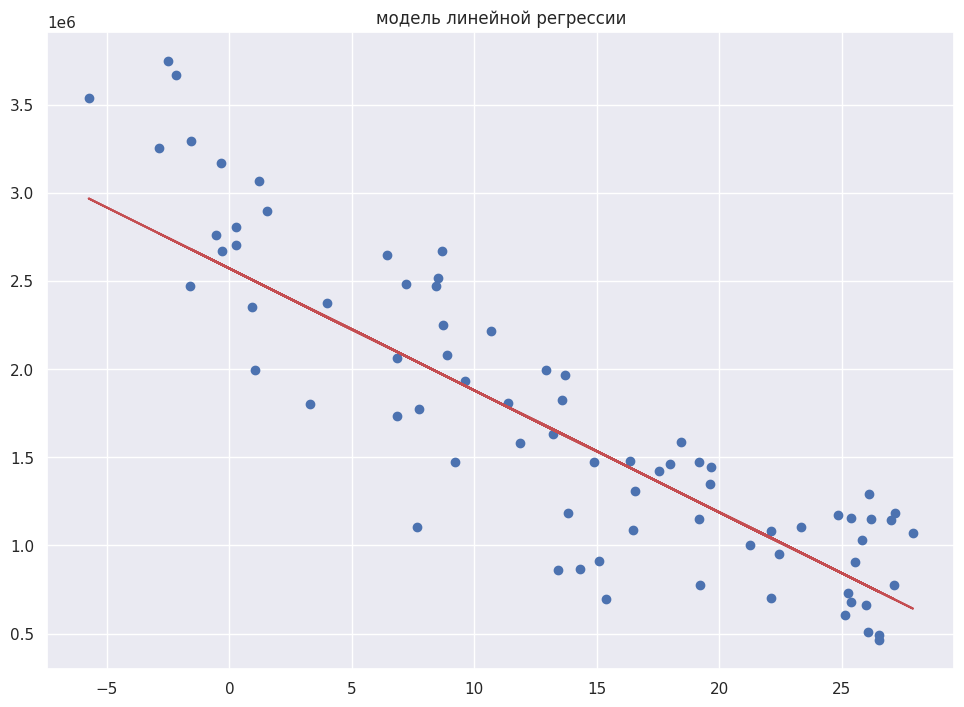

In [ ]:
plt.scatter(X_test, y_test)
plt.title('модель линейной регрессии')
plt.plot(X_test, y_pred, c='r')

Альтернативный способ

In [ ]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
X_const = sm.add_constant(X_train) # техническая особенность библиотеки, надо руками добавить константу

In [ ]:
X_const

,const,Temperature
239,1.0,2.74
84,1.0,1.23
29,1.0,22.16
168,1.0,0.54
167,1.0,1.14
...,...,...
106,1.0,8.30
14,1.0,5.73
92,1.0,21.79
179,1.0,-1.34


In [ ]:
model = sm.OLS(y_train, X_const)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    Sum   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     438.1
Date:                Sun, 09 Jun 2024   Prob (F-statistic):           2.13e-49
Time:                        18:19:53   Log-Likelihood:                -2525.3
No. Observations:                 176   AIC:                             5055.
Df Residuals:                     174   BIC:                             5061.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2.572e+06   5.39e+04     47.695      

In [ ]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  const          2.571666e+06
Temperature   -6.918368e+04
dtype: float64
R2:  0.7157287338799033


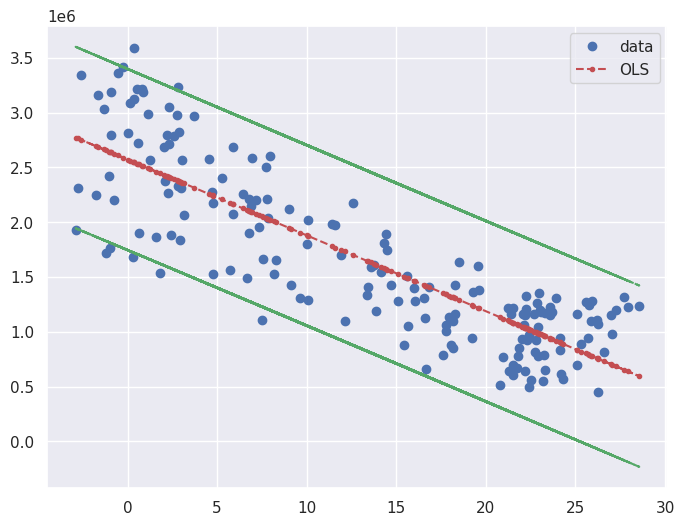

In [ ]:
prstd, iv_l, iv_u = wls_prediction_std(results)
# для каждой точки получаем не просто сам прогноз, но и доверительный интервал
# с увеличением количества факторов, этот интервал будет уменьшаться
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(X_const.iloc[:, 1], y_train, 'o', label="data")
ax.plot(X_const.iloc[:, 1], results.fittedvalues, 'r--.', label="OLS")
ax.plot(X_const.iloc[:, 1], iv_u, 'g--')
ax.plot(X_const.iloc[:, 1], iv_l, 'g--')
ax.legend(loc='best')

Text(0.5, 1.0, 'график остатков')

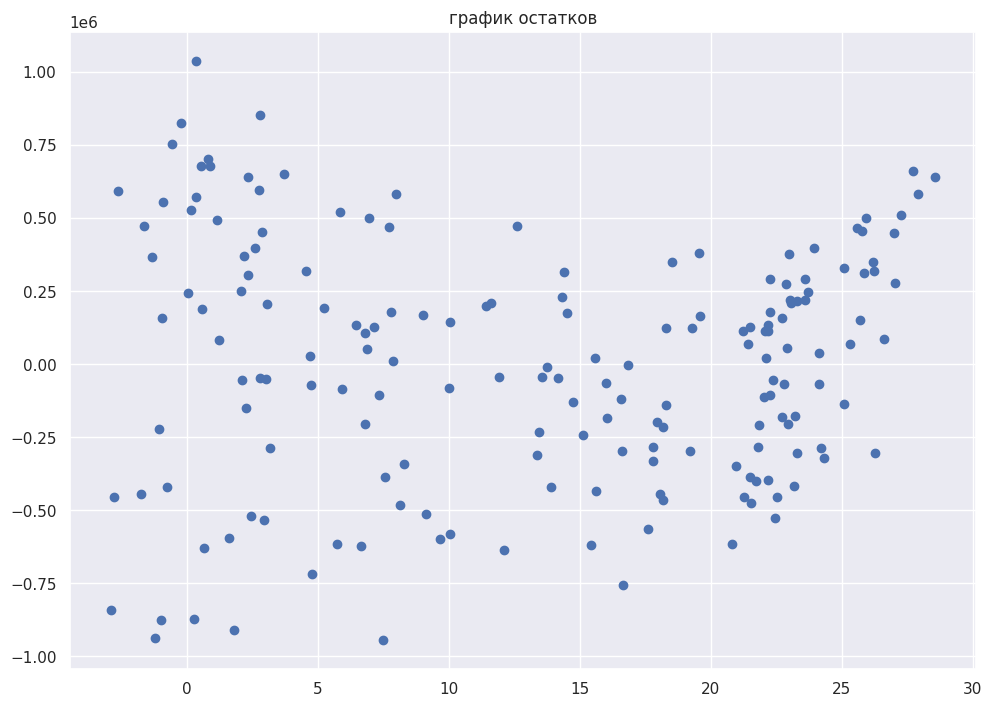

In [ ]:
# посмотрим на остатки
plt.scatter(X_const.iloc[:, 1], results.resid)
plt.title('график остатков')

Text(0.5, 1.0, 'гистограмма распределения потребления')

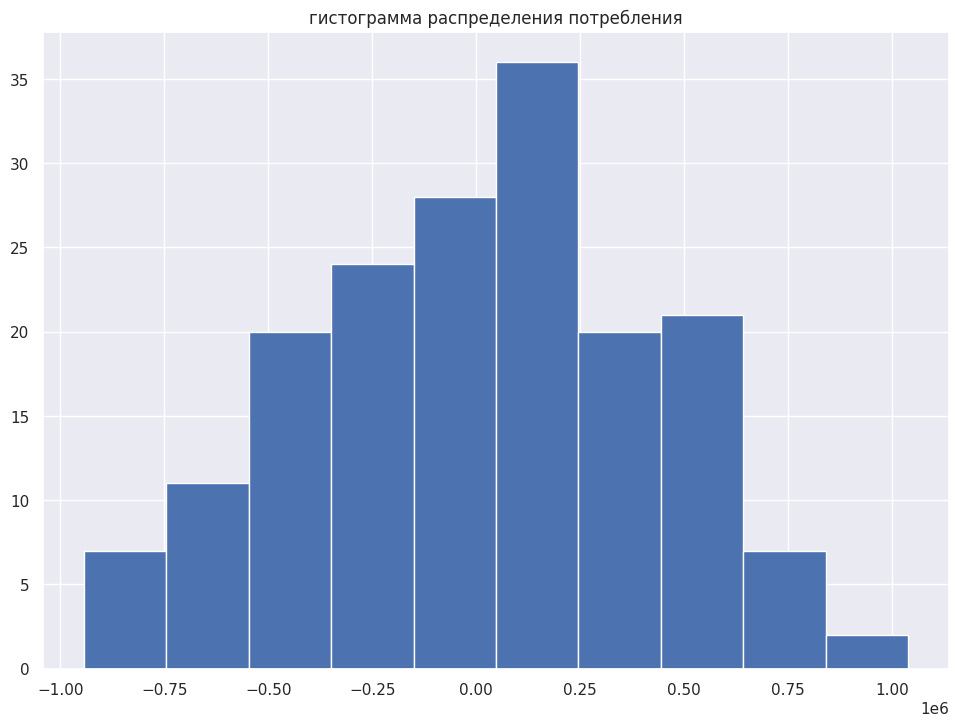

In [ ]:
plt.hist(results.resid)
plt.title('гистограмма распределения потребления')

Выводы:

Построена модель линейной регрессии двумя способами, определяющая объемы потребления газа при определенной температуре, построен также график остатков